# OpenCV를 이용한 라인, 원,사각형 그리기

### 이미지 다운로드

In [70]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-drawing/opencv-drawing.zip
!unzip -qq opencv-drawing.zip
%cd opencv-drawing

--2021-04-17 08:39:11--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-drawing/opencv-drawing.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.193.65
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.193.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 337273 (329K) [application/zip]
Saving to: ‘opencv-drawing.zip’

opencv-drawing.zip  100%[===================>] 329.37K   997KB/s    in 0.3s    

2021-04-17 08:39:12 (997 KB/s) - ‘opencv-drawing.zip’ saved [337273/337273]

/content/opencv-drawing


## 수행

### 패키지 로드

In [3]:
# import the necessary packages
from matplotlib import pyplot as plt
import cv2
import numpy as np
import argparse

### 함수 생성(이미지 뷰)

In [4]:
def plt_imshow(title, image):
	'''
  이미지를 BGR프레임에서 RGB컬러로 바꾸고 이미지 보여줌
  '''
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### OpenCV를 이용한 기본 도형 그리기 

In [45]:
# 3개의 채널(RGB)을 갖는 300 * 300을 갖는 영행렬 생성
# (Red, Green, and Blue) with a black background
# 0으로 초기화된 영행렬 구성

# RGB 이미지는 0 ~ 255의 값으로 구성된 픽셀값으로 이루어지므로 Since we represent our image as an RGB image with pixels in the range [0, 255], 
# 8bit unsigned integer를 dtype의 인자로 갖어야 한다.
canvas = np.zeros((300, 300, 3), dtype="uint8")
#display(canvas,  canvas.shape)

In [31]:
help(cv2.line)

Help on built-in function line:

line(...)
    line(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img
    .   @brief Draws a line segment connecting two points.
    .   
    .   The function line draws the line segment between pt1 and pt2 points in the image. The line is
    .   clipped by the image boundaries. For non-antialiased lines with integer coordinates, the 8-connected
    .   or 4-connected Bresenham algorithm is used. Thick lines are drawn with rounding endings. Antialiased
    .   lines are drawn using Gaussian filtering.
    .   
    .   @param img Image.
    .   @param pt1 First point of the line segment.
    .   @param pt2 Second point of the line segment.
    .   @param color Line color.
    .   @param thickness Line thickness.
    .   @param lineType Type of the line. See #LineTypes.
    .   @param shift Number of fractional bits in the point coordinates.



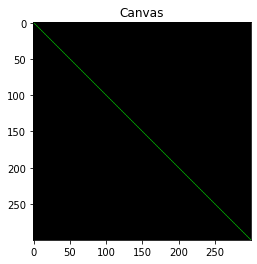

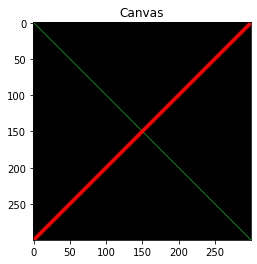

In [46]:
# 캔버스의 좌측 상단 코너에서 우측하단의 직선라인 그리기 
# 색깔은 그린색
green = (0, 255, 0)
cv2.line(canvas, (0, 0), (300, 300), green)
plt_imshow("Canvas", canvas)

# colab혹은 쥬피터 노트북에서 사용시에만 적용
#cv2.imshow("Canvas", canvas)
#cv2.waitKey(0)

# 우측상단에서 좌측하단으로 두꺼운 빨간색 라인 그리기
red = (0, 0, 255)
cv2.line(canvas, (300, 0), (0, 300), red, 3)   # 시작위치, 종료위치, 색깔, 라인타입(숫자가 클수록 두께가 두꺼워짐)
plt_imshow("Canvas", canvas)

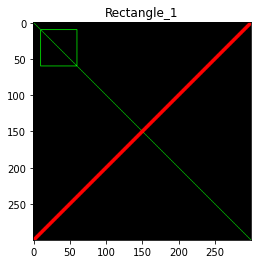

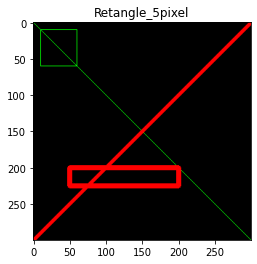

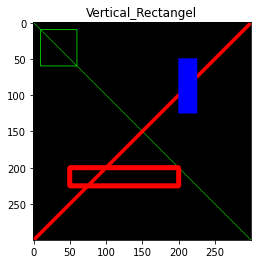

In [47]:
# draw a green 50x50 pixel square, starting at 10x10 and ending at 60x60
cv2.rectangle(canvas, (10, 10), (60, 60), green, 1)
plt_imshow("Rectangle_1", canvas)


# 5픽셀의 두께로 빨간색의 사각형 그리기 
red= (0, 0, 255)
cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)
plt_imshow("Retangle_5pixel", canvas)

# 파란색의 수직 사각형 그리되 내부가 파란색으로 채워짐
blue = (255, 0, 0)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)  # `-1`의 의미는 내부를 색깔로 채운다는 의미
plt_imshow("Vertical_Rectangel", canvas)

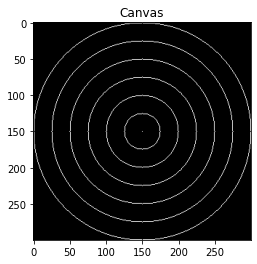

In [48]:
# array객체 초기화 후, 중앙 위치 계산
# 색깔 지정
canvas = np.zeros((300, 300, 3), dtype='uint8')
(centerX, centerY) = (canvas.shape[0]// 2, canvas.shape[0] // 2)
white = (255, 255, 255)

# 반지름을 25씩 증가시키면서 원을 만듦
for r in range(0, 175, 25):
  cv2.circle(canvas, (centerX, centerY), r, white, 1)
# show our work of art
plt_imshow("Canvas", canvas)

### np.random.randint도움말

In [51]:
help(np.random.randint)

Help on built-in function randint:

randint(...) method of numpy.random.mtrand.RandomState instance
    randint(low, high=None, size=None, dtype=int)
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    .. note::
        New code should use the ``integers`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    low : int or array-like of ints
        Lowest (signed) integers to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int or array-like of ints, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distributi

### Read Eval Print Loop

In [59]:
radius = np.random.randint(5, high=200)  # low값을 5부터 시작해서 가장 큰 값이 200까지 무작위로 정수값 리턴
color = np.random.randint(0, high=200, size=(3,))   # low값을 0부터 시작해서 200이하의 값을 무작위로 리턴
pt = np.random.randint(0, high=300, size=(2,))      # 0부터 300까지 무작위의 포인트를 리턴
display(radius, color, pt)

147

array([131, 109, 186])

array([170,  48])

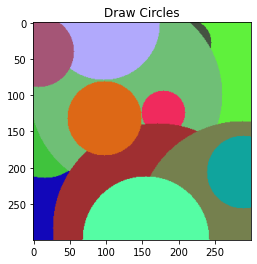

In [65]:
# array initialization.
canvas = np.zeros((300, 300, 3), dtype="uint8")

# let's draw 25 random circles
for i in range(0, 25):
  # low값을 5부터 시작해서 가장 큰 값이 200까지 무작위로 정수값 리턴
  # 무작위 반지름 및 색깔 리턴
  radius = np.random.randint(5, high=200)
  color = np.random.randint(0, high=256, size= (3,)).tolist()  # 튜플형태를 리스트로 리턴
  pt = np.random.randint(0, high=300, size=(2, )).tolist()  # 원소가 2개인 튜플을 갖는 리스트 리턴
  # 원 그리기
  cv2.circle(canvas, tuple(pt), radius, color, -1)

# display our masterpiece to our screen
plt_imshow("Draw Circles", canvas)

### OpenCV를 이용해 이미지위에 도형 그리기

In [71]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", type=str, default="adrian.png",
#	help="path to the input image")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "adrian.png"
}

(450, 600, 3)

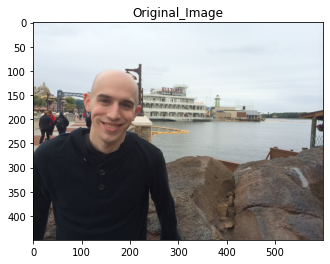

In [73]:
# load the input image from disk
image = cv2.imread(args["image"])
display(image.shape)
plt_imshow("Original_Image", image)

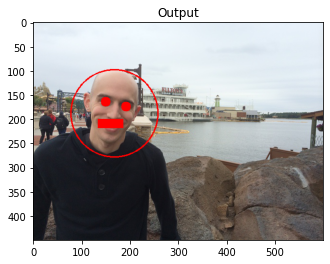

In [76]:
# draw a circle around my face, two filled in circles covering my
# eyes, and a rectangle over top of my mouth
cv2.circle(image, (168, 188), 90, (0, 0, 255), 2)  # 얼굴을 감싼 원
cv2.circle(image, (150, 164), 10, (0, 0, 255), -1) # 첫번째 눈
cv2.circle(image, (192, 174), 10, (0, 0, 255), -1)  #  두번째 눈
cv2.rectangle(image, (134, 200), (186, 218), (0, 0, 255), -1)  # 입의 위치

# show the output image
plt_imshow("Output", image)

### 진도개 이미지 로드 

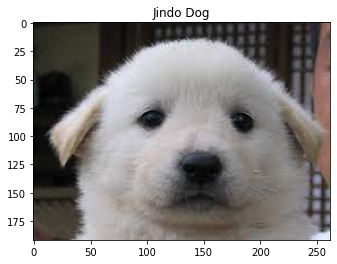

In [106]:
image = cv2.imread("/content/opencv-drawing/dog.jpg")
plt_imshow("Jindo Dog", image)

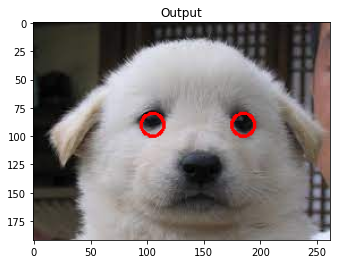

In [107]:
#눈에 마킹
cv2.circle(image, (105, 90), 10, (0, 0, 255), 2)
cv2.circle(image, (185, 90), 10, (0, 0, 255), 2)
plt_imshow("Output", image)